Import Required Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

Loading Dataset

In [11]:
df = pd.read_csv('Twitter_Data.csv')

In [12]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


Data Cleaning

In [14]:
# Dropping rows with missing values
df.dropna(inplace=True)

# Checking for null values
print(df.isnull().sum())

clean_text    0
category      0
dtype: int64


Data Visualization

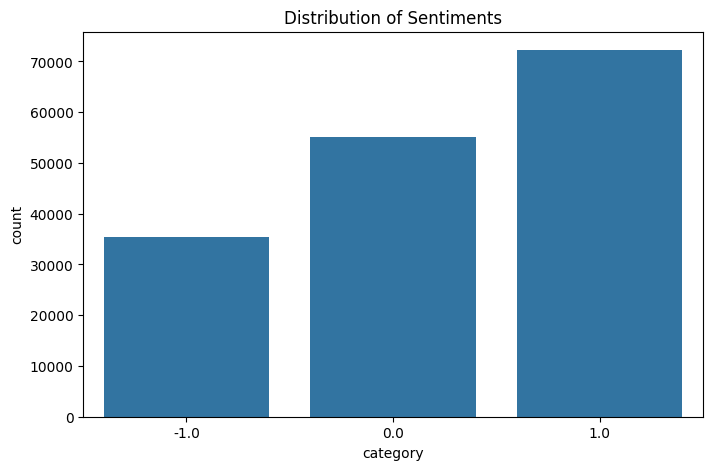

In [15]:
# Visualizing the count of each sentiment category
plt.figure(figsize=(8, 5))
sns.countplot(x='category', data=df)
plt.title('Distribution of Sentiments')
plt.show()

Feature Extraction (Text to number)

In [16]:
# Converting text into numerical vectors
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['clean_text'])
y = df['category']

Model Training

In [17]:
# Splitting the data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

 Model Evaluation

In [18]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Printing the performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8553107933975578
              precision    recall  f1-score   support

        -1.0       0.86      0.75      0.80      7152
         0.0       0.81      0.95      0.88     11067
         1.0       0.90      0.83      0.86     14375

    accuracy                           0.86     32594
   macro avg       0.86      0.84      0.85     32594
weighted avg       0.86      0.86      0.85     32594

